# `Assignent 2`

In [1]:
import numpy as np

import random

import cmath

import math

from matplotlib import pyplot as plt

import time

from scipy.fftpack import dct

## Creating Random Data

In [2]:
arr = list()

for _ in range(20):
    
    arr.append(random.randint(0,50))
    
arr

[23, 1, 17, 49, 29, 34, 2, 35, 12, 23, 28, 44, 45, 39, 1, 36, 19, 9, 43, 18]

# myDFT 

In [3]:
def myDFT(x):
    
    N = len(x)
    
    X = list()
    
    for k in range(N):
        
        val = complex(0,0)
        
        for n in range(N):
            
            c = -2*k*n*cmath.pi/N
            
            val += x[n] * cmath.exp(complex(0,c))
            
        X.append(val)
        
    return X
            
my_answer = myDFT(arr)

# Standard DFT

In [4]:
def std_DFT(arr):
    
    return np.fft.fft(arr)

answer = std_DFT(arr)

# Verifying correctness of the function myDFT

In [5]:

for i in range(len(arr)):
    
    print("{}\t{}\n".format(my_answer[i],answer[i]))
    

(507+0j)	(507+0j)

(-43.722461088849485+8.83574219475912j)	(-43.72246108884945+8.835742194759124j)

(4.680339887498976-56.14509061085494j)	(4.680339887498944-56.14509061085498j)

(-55.3296035793138+80.19600622538115j)	(-55.329603579313726+80.19600622538115j)

(-38.10990336999405+26.503336916297272j)	(-38.1099033699941+26.503336916297275j)

(37.00000000000007+76j)	(37+76j)

(-17.680339887499002+17.613313155079084j)	(-17.680339887498945+17.613313155079137j)

(-29.336027880681307-44.95993824788155j)	(-29.33602788068123-44.95993824788137j)

(87.10990336999426-32.250164841458385j)	(87.10990336999411-32.250164841458314j)

(66.38809254884447-39.59967421725926j)	(66.38809254884441-39.599674217259334j)

(-69-9.087374434182633e-14j)	(-69+1.7763568394002505e-15j)

(66.38809254884475+39.59967421725938j)	(66.38809254884441+39.59967421725932j)

(87.10990336999417+32.25016484145832j)	(87.10990336999411+32.250164841458314j)

(-29.33602788068116+44.95993824788113j)	(-29.33602788068123+44.95993824788137

`We can see that the output from myDFT matches the numpy standard library output for computing DFT which shows , the function the works correctly`

# myDCT

In [6]:
def myDCT(x):
    
    N = len(x)
    
    X = list()
    
    val = 0
    
    for k in range(N):
        
        for n in range(N):
            
            phase = (n+0.5)*k*math.pi/N
            
            val += x[n] * math.cos(phase)
            
        X.append(val)
        
    return X


myDCT(arr)

[507.0,
 489.2024066982028,
 447.4004562620921,
 464.62761546437514,
 451.72909606338163,
 348.4608950670682,
 335.57008224052015,
 357.690543719375,
 342.43725481500087,
 372.68007371692784,
 452.5831399910078,
 486.94912171638106,
 490.80634834469737,
 546.6744472567739,
 493.2965709928819,
 585.8205066148873,
 582.0672177105135,
 577.5251654532836,
 548.7984146804507,
 468.302251215319]

In [7]:
#dft_data has execution time for dft

dft_data = list()

#dct_data has execution time for dct

dct_data = list()

for l in range(10,310,10):
    
    lst = list()
    
    for i in range(l):
        
        lst.append(random.randint(0,50))
    
   # print(lst)
        
    start = time.process_time()
        
    for j in range(50):
        
        myDFT(lst)
    
    end = time.process_time()
    
    dft_data.append((end - start)/50)
    
    for k in range(50):
        
        myDCT(lst)
        
    end1 = time.process_time()
    
    dct_data.append((end1 - end)/50)    


In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


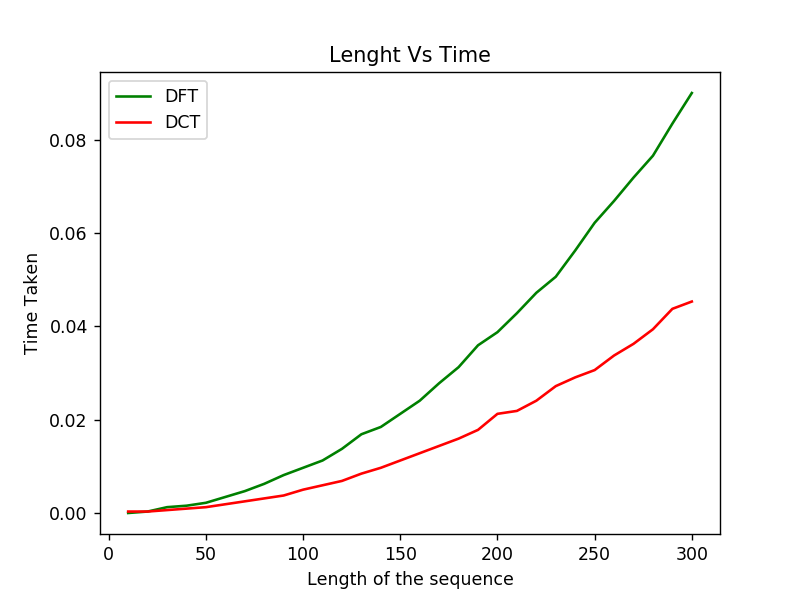

In [9]:
plt.figure()

plt.plot(range(10,310,10),dft_data,c='g',label="DFT")
plt.plot(range(10,310,10),dct_data,c='r',label = "DCT")
plt.xlabel("Length of the sequence")
plt.ylabel("Time Taken")
plt.title("Lenght Vs Time")

plt.legend(loc = 2)

plt.show()

*For a given sequence of length from the plot, we can see that execution time for DCT is less than that of DFT and the magnitude of difference increases with the length of the sequence*

In [10]:
rough= list()

for _ in range(30):
    
    rough.append(random.randint(0,50))

## Avearge time and std.deviation calculations

In [11]:
%timeit myDFT(rough)

988 µs ± 78.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


``The average running time for a sequence of length 30 is 988 micro seconds with standard deviation of 78.6 micro seconds``

In [12]:
%timeit myDCT(rough)

479 µs ± 21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


`The average running time for a sequence of length 30 is 479 micro seconds with standard deviation of 21 micro seconds`